<a href="https://colab.research.google.com/github/RuslanAvtobot/IT_volonteer/blob/main/word_analize_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from tqdm import tqdm

tqdm.pandas()

In [ ]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Хакатон_IT_Volonteer/data/data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2778 non-null   int64 
 1   id              2778 non-null   int64 
 2   date            2778 non-null   object
 3   username        2778 non-null   object
 4   tweet           2778 non-null   object
 5   replies_count   2778 non-null   int64 
 6   retweets_count  2778 non-null   int64 
 7   likes_count     2778 non-null   int64 
 8   hashtags        2778 non-null   object
 9   fond_name       2778 non-null   object
dtypes: int64(5), object(5)
memory usage: 217.2+ KB


In [ ]:
df.sample(4)

,Unnamed: 0,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name
2567,2,1544603499962531841,2022-07-06,hitechletnach,"@vcru Ага, в фонд Потанина :)",0,0,0,[],Фонд Потанина
2739,186,1518310091296219136,2022-04-24,_thirdperson_,"Фонд «подари жизнь», такую хуйню могли выдумат...",0,0,0,[],"""Подари жизнь"""
1688,175,1087343038198960128,2019-01-21,navalny_kld,Настя Рыбка переехала из таиландской тюрьмы в ...,0,0,4,[],"""Вольное дело"""
1271,83,1311347998945939456,2020-09-30,yura_teplyakov,Друзья - вы молодцы! Игорь Рыбаков прочитал сц...,0,0,0,"['непищать', 'игорьрыбаков', 'юратепляков', 'r...",Рыбаков фонд


In [ ]:
df[df['id'] == '']

,Unnamed: 0,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name


In [ ]:
import pymorphy2

In [ ]:
morph = pymorphy2.MorphAnalyzer()

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
spec_chars = string.punctuation + '«' + '»' + '—' #добавление доп спец симловов к базовым
print(spec_chars)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~«»—


Убираем спец символы

In [ ]:
def rem_spec_chars(x):
  x = "".join([ch for ch in x if ch not in spec_chars])
  return x

In [ ]:
df['tweet_lem'] = df['tweet'].progress_apply(rem_spec_chars)

100%|██████████| 2778/2778 [00:00<00:00, 28186.05it/s]


Подгтовка текста, перевод всех букв в нижний регистр

In [ ]:
def low(x):
  x = list(x.split())
  x = [w.lower() for w in x]
  return x

In [ ]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(low)

100%|██████████| 2778/2778 [00:00<00:00, 78231.34it/s]


Лематизация текста

In [ ]:
def lem(x):
    #x = list(x.split())
    x = [morph.parse(w)[0].normal_form for w in x]
    return x

In [ ]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(lem)

100%|██████████| 2778/2778 [00:30<00:00, 91.95it/s] 


In [ ]:
df.sample(4)

,Unnamed: 0,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,tweet_lem
1027,0,700250868063584256,2016-02-18,uralfondnb,#НашеБудущее #ЗОЖ #Реабилитация #Реабилитацион...,0,0,1,"['нашебудущее', 'зож', 'реабилитация', 'реабил...","""Наше будущее""","[нашебудущий, зож, реабилитация, реабилитацион..."
1476,21,1508714069271924739,2022-03-29,badischerc,Каждый месяц около 350 человек обращаются в ф...,0,1,1,[],"""Свет""","[каждый, месяц, около, 350, человек, обращатьс..."
1169,40,1237823376078618625,2020-03-11,gritsovo_school,Педагогические работники @GricovoShkola успеш...,0,2,2,"['рыбаковфонд', 'фоксфорд']",Рыбаков фонд,"[педагогический, работник, gricovoshkola, успе..."
492,73,1484422242750636033,2022-01-21,dshi2oskol,"20 января благотворительным фондом «Искусство,...",0,0,1,[],"""Искусство, наука и спорт""","[20, январь, благотворительный, фонд, искусств..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2778 non-null   int64 
 1   id              2778 non-null   int64 
 2   date            2778 non-null   object
 3   username        2778 non-null   object
 4   tweet           2778 non-null   object
 5   replies_count   2778 non-null   int64 
 6   retweets_count  2778 non-null   int64 
 7   likes_count     2778 non-null   int64 
 8   hashtags        2778 non-null   object
 9   fond_name       2778 non-null   object
 10  tweet_lem       2778 non-null   object
dtypes: int64(5), object(6)
memory usage: 238.9+ KB


Убираем стоп-слова

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [ ]:
#russian_stopwords = nltk.stopwords.words("russian")
#print(russian_stopwords)

AttributeError: ignored

К стоп словам добавляем все слова которые в нашем контексте не несут смысловой нагрузки. Т.е. убираем слово "фонд" т.к. мы знаем что мы анализируем фонды и это слово будет постоянно встечаться.

In [ ]:
russian_stopwords.extend(['фонд', 'благотворительный', 'абсолют-помощь', 'агат', 'базис', 'дар',
                          'хамовник', 'искусство', 'наука', 'спорт', 'прохоров', 'михаил', 'мпрохоров', 'м',
                          'мельниченко', 'андрей', 'муслим', 'магомаев', 'ноосфера', 'наш', 'нашебудущий', 
                          'будущее', 'рыбаковфонд', 'рыбак', 'сафмара', 'свет', 'дерипаск', 'олег', 
                          'вольный', 'дело', 'тимченко', 'геннадий', 'благотворительный', 'елена',
                          'жизнь', 'фонд', 'подарить', 'хаматовый', 'чулпан', 'актриса', 
                          'потанин', 'владимир', 'фондпотанин', 'фондмихаилапрохоров', 'абсолютпомощь',
                          'это', 'год', 'і', 'iii', 'алишер', 'усманов'])

In [ ]:
english_stopwords = stopwords.words("english")

In [ ]:
def stop_words(x):
  new_x = []
  for w in x:
    if w not in russian_stopwords:
      if w not in english_stopwords:
        new_x.append(w)
  return new_x

In [ ]:
df['tweet_lem'] = df['tweet_lem'].progress_apply(stop_words)

100%|██████████| 2778/2778 [00:00<00:00, 9285.36it/s]


In [ ]:
df[df['id'] == 1437690361858641923].tweet_lem

580    [кратко, театр, нация, репертуар, настоящий, и...
643    [кратко, театр, нация, репертуар, настоящий, и...
Name: tweet_lem, dtype: object

In [ ]:
df.sample(4)

,Unnamed: 0,id,date,username,tweet,replies_count,retweets_count,likes_count,hashtags,fond_name,tweet_lem
7,7,1547220178043342852,2022-07-13,postnauka_ru,Этот материал — часть проекта «Мир особенного ...,0,0,3,[],"""Абсолют-помощь""","[материал, часть, проект, мир, особенный, ребё..."
1162,33,1251638778411827207,2020-04-18,amaska2005,🥳 🗝️ 💡 It was a great honour for me to sh...,2,0,7,"['весенняяшкола2020', 'рыбаковфонд', 'remotele...",Рыбаков фонд,"[🥳, 🗝️, 💡, great, honour, share, knowledge, fl..."
988,38,669465634925883393,2015-11-25,uralfondnb,#ежедневныеразмышления ТОЛЬКО СЕГОДНЯ: Я буду...,0,0,0,['ежедневныеразмышления'],"""Наше будущее""","[ежедневныеразмышление, сегодня, размышлять, д..."
728,62,1114069263906742272,2019-04-05,elizabeth_en22,Фонд А. Мельниченко и СГК помогают юным учёным...,0,0,1,[],Фонд Мельниченко,"[сгк, помогать, юный, учёный, покорять, научны..."


In [ ]:
fonds = df['fond_name'].unique().tolist()

Проверка на повторяющиеся твиты

In [ ]:
df['id'].count()

2778

In [ ]:
df['id'].nunique()

1840

In [ ]:
df.drop_duplicates(subset=['id'], inplace= True)

In [ ]:
fonds

['"Абсолют-помощь"',
 '"Агат"',
 '"Базис"',
 '"Дар"',
 '"Хамовники"',
 '"Искусство, наука и спорт"',
 'Фонд Прохорова',
 'Фонд Мельниченко',
 'Фонд Муслима Магомаева',
 '"Ноосфера"',
 '"Наше будущее"',
 'Рыбаков фонд',
 '"Сафмар"',
 '"Свет"',
 '"Вольное дело"',
 'Фонд Тимченко',
 'Фонд Потанина',
 '"Подари жизнь"']

Строим частотный анализ слов. Оставляем только ТОП 10 слов

In [ ]:
fond_words_voc = {}
for j in tqdm(fonds):
  fond_words_voc[j] = list()

100%|██████████| 18/18 [00:00<00:00, 148034.26it/s]


In [ ]:
for j in tqdm(fonds):
  for i in df[df['fond_name'] == j].tweet_lem:
    for w in i:
      fond_words_voc[j].append(w)

100%|██████████| 18/18 [00:00<00:00, 418.33it/s]


In [ ]:
from nltk.probability import FreqDist

In [ ]:
most_words_by_fond = {}

In [1]:
for i in fond_words_voc.keys():
  most_words_by_fond[i] = FreqDist(fond_words_voc[i]).most_common(10) #цифра 10 указывает количество оставляемых слов

NameError: ignored

In [ ]:
most_words_by_fond

{'"Абсолют-помощь"': [('проект', 61),
  ('ребёнок', 32),
  ('особенный', 30),
  ('партнёр', 27),
  ('материал', 26),
  ('часть', 26),
  ('мир', 26),
  ('конкурс', 11),
  ('благотворительность', 8),
  ('статья', 7)],
 '"Агат"': [('предприниматель', 8),
  ('приглашать', 7),
  ('конкурс', 6),
  ('день', 5),
  ('начинающий', 5),
  ('открытый', 4),
  ('дверь', 4),
  ('молодой', 3),
  ('екатеринбург', 3),
  ('поддержка', 3)],
 '"Базис"': [('конкурс', 7),
  ('грант', 7),
  ('теоретический', 7),
  ('физика', 7),
  ('развитие', 6),
  ('дольщик', 5),
  ('приём', 4),
  ('заявка', 4),
  ('учёный', 4),
  ('область', 4)],
 '"Вольное дело"': [('который', 40),
  ('санкция', 35),
  ('поддержка', 33),
  ('первый', 28),
  ('пенсионный', 28),
  ('конкурс', 27),
  ('россия', 24),
  ('национальный', 23),
  ('бизнесмен', 23),
  ('провести', 22)],
 '"Дар"': [('передать', 22),
  ('книга', 15),
  ('который', 12),
  ('медведев', 10),
  ('библиотека', 10),
  ('всё', 9),
  ('музей', 9),
  ('весь', 8),
  ('ребёнок'

Построим облако слов 

In [ ]:
lst = []
for i in most_words_by_fond['Фонд Тимченко']:
  lst.append(i[0])
print(lst)

['конкурс', 'проект', 'ребёнок', 'семья', 'программа', 'новость', 'победитель', 'помощь', 'культурный', 'фондтимченко']


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
text_raw = " ".join(lst)

In [ ]:
text_raw

'конкурс проект ребёнок семья программа новость победитель помощь культурный фондтимченко'

In [ ]:
wordcloud = WordCloud().generate(text_raw)

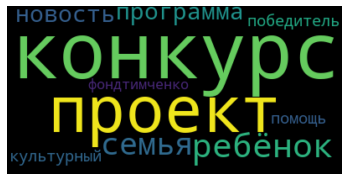

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('')
plt.axis("off")
plt.show()

Построим облака для всех фондов

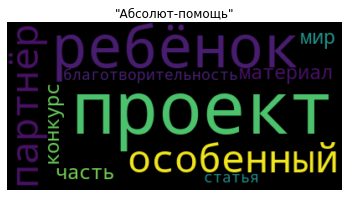

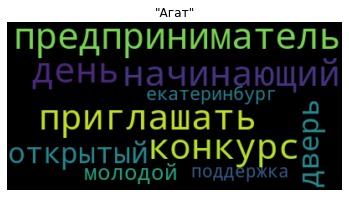

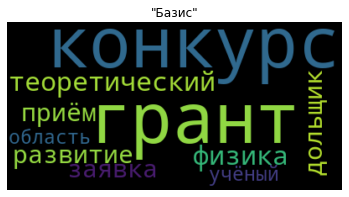

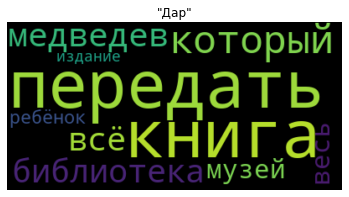

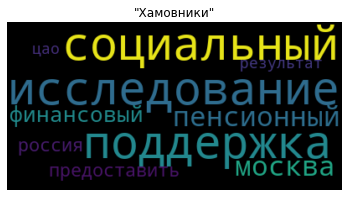

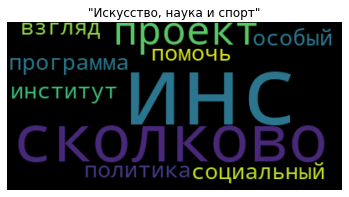

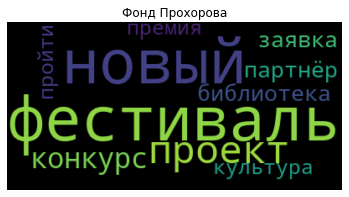

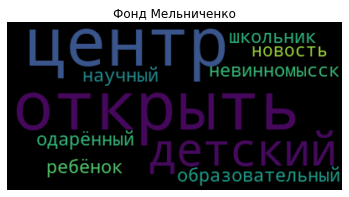

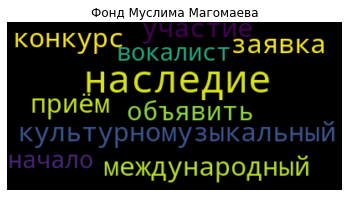

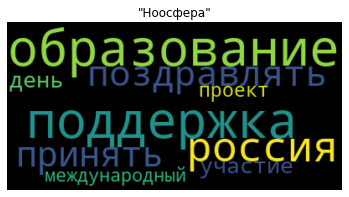

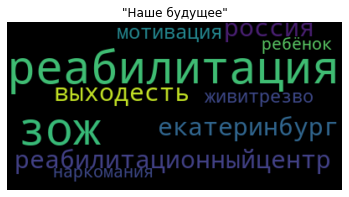

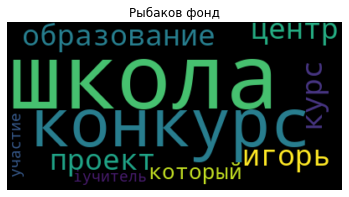

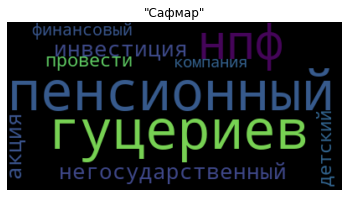

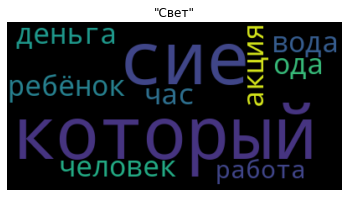

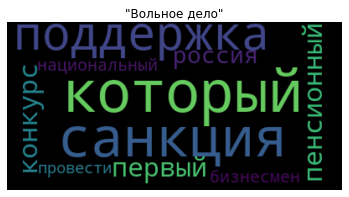

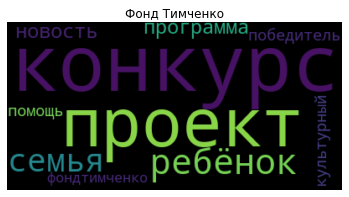

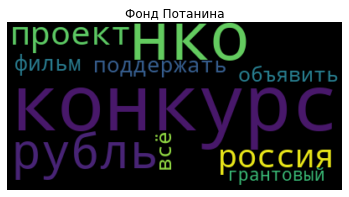

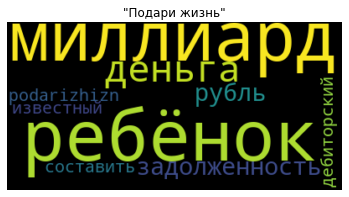

In [ ]:
for i in fond_words_voc.keys():
  lst = []
  for j in most_words_by_fond[i]:
    lst.append(j[0])
  text_raw = " ".join(lst)
  wordcloud = WordCloud().generate(text_raw)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(i)
  plt.axis("off")
  plt.show()